In [198]:
from pyforest import *
lazy_imports()

['import keras',
 'import altair as alt',
 'import os',
 'import plotly.graph_objs as go',
 'from dask import dataframe as dd',
 'import re',
 'import datetime as dt',
 'from sklearn.manifold import TSNE',
 'import dash',
 'import bokeh',
 'from fbprophet import Prophet',
 'import glob',
 'import gensim',
 'from pyspark import SparkContext',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import awswrangler as wr',
 'from xlrd import open_workbook',
 'import fbprophet']

In [199]:
from catboost.datasets import amazon
traindf,testdf=amazon()

In [200]:
traindf.shape

(32769, 10)

In [201]:
testdf.shape

(58921, 10)

In [202]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [203]:
testdf.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [204]:
traindf.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [205]:
traindf.dtypes

ACTION              int64
RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

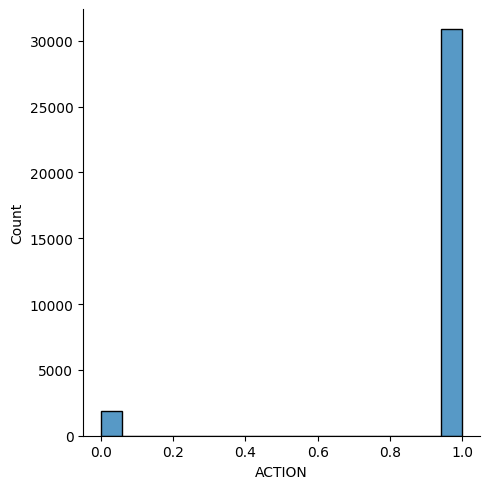

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

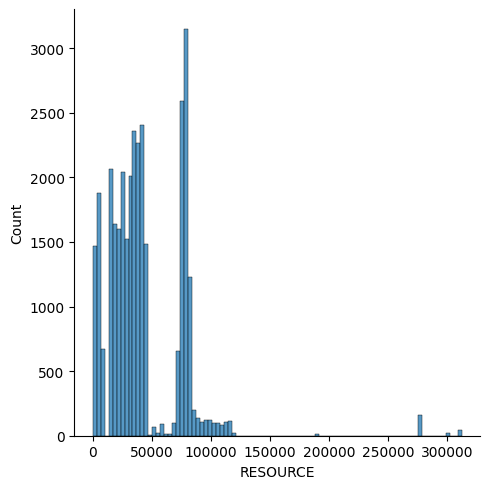

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

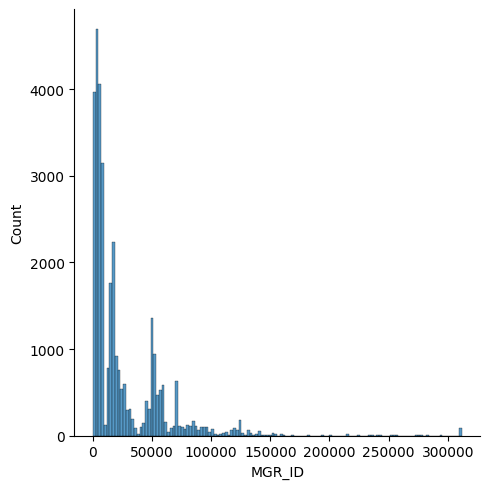

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

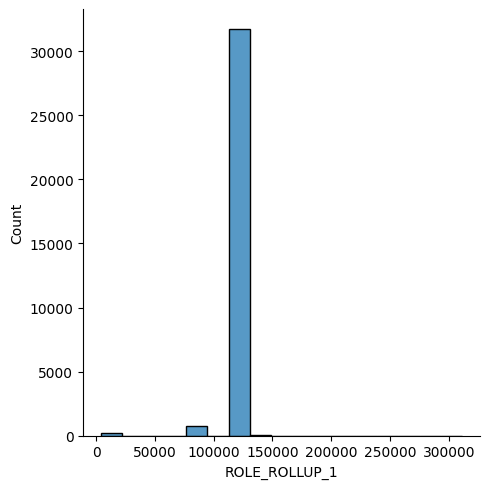

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

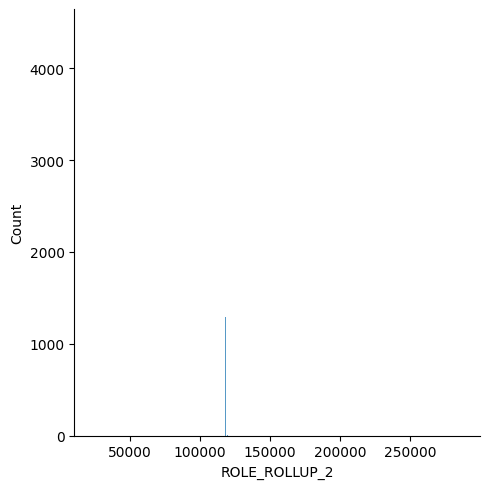

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

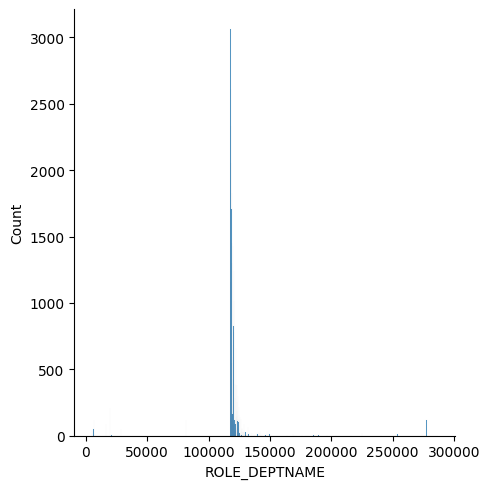

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

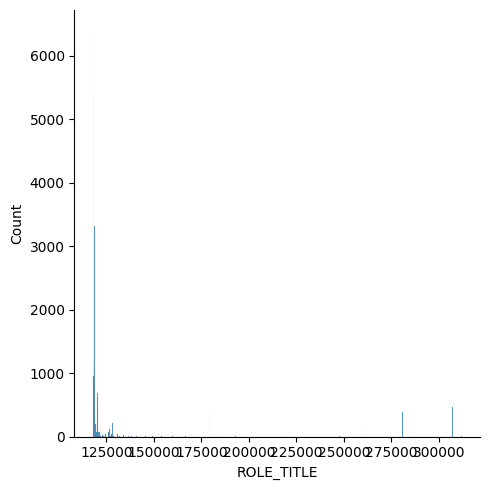

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

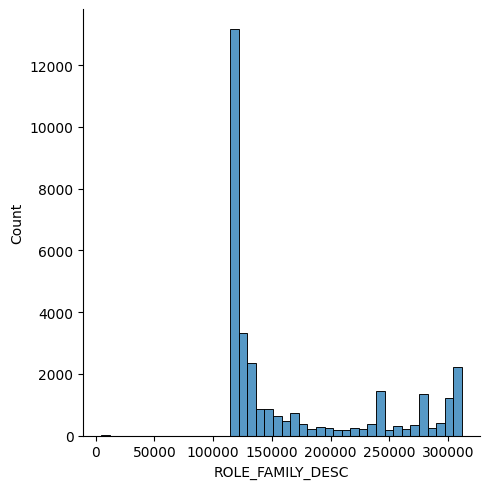

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

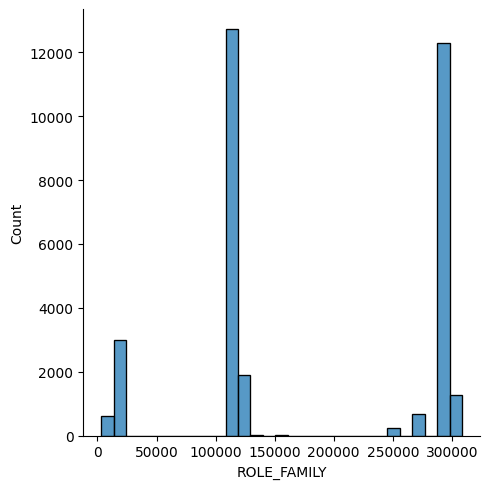

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

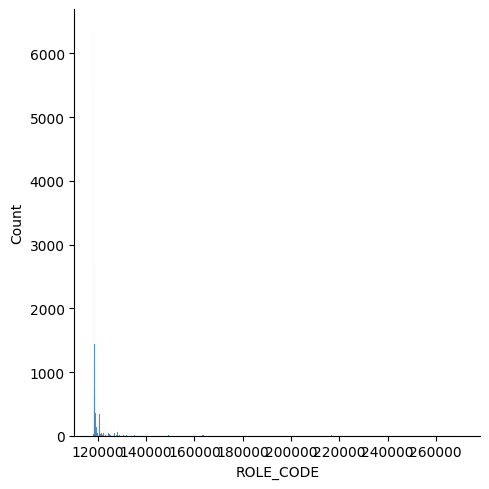

In [206]:
for col in traindf.columns:
  sns.displot(x=col,data=traindf)
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

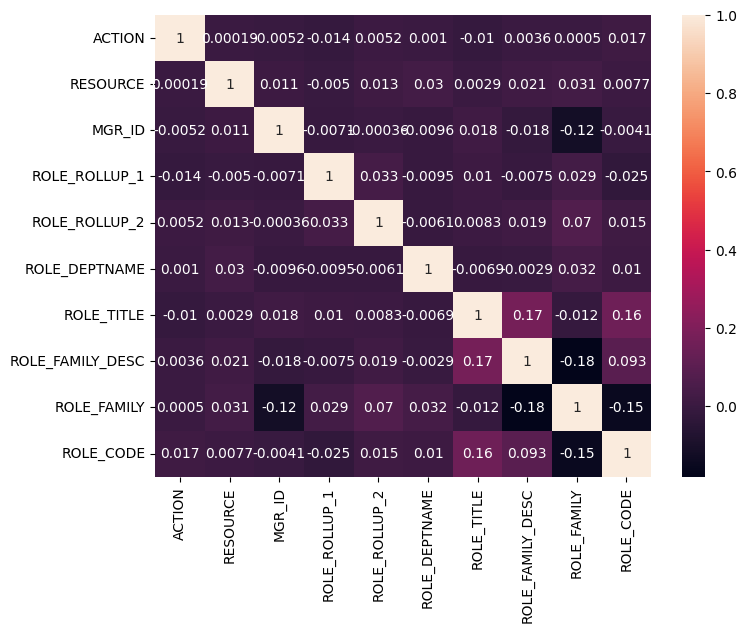

In [207]:
plt.figure(figsize=(8,6))
sns.heatmap(traindf.corr(),annot=True)
plt.show()

<h5> There is no correlation between attributes (zero correlation). </h5>

In [208]:
traindf['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

In [209]:
# splitting the data
y=traindf['ACTION']
x=traindf.drop('ACTION',axis=1)

In [210]:
testdf.drop('id',axis=1,inplace=True)

In [211]:
x_test=testdf

In [212]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

<IPython.core.display.Javascript object>

In [213]:
from catboost import CatBoostClassifier,Pool


In [214]:
%%time
params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': 1
         }
model=CatBoostClassifier(**params)
model.fit(x_train,y_train,eval_set=(x_valid,y_valid),use_best_model=True)

Learning rate set to 0.071005
0:	test: 0.5750308	best: 0.5750308 (0)	total: 13.3ms	remaining: 13.3s
200:	test: 0.7910145	best: 0.7910145 (200)	total: 2.19s	remaining: 8.7s
400:	test: 0.8169425	best: 0.8171019 (395)	total: 4.34s	remaining: 6.48s
600:	test: 0.8247378	best: 0.8250976 (591)	total: 6.49s	remaining: 4.31s
800:	test: 0.8276630	best: 0.8279139 (792)	total: 9.38s	remaining: 2.33s
999:	test: 0.8316774	best: 0.8316774 (999)	total: 12.3s	remaining: 0us

bestTest = 0.831677438
bestIteration = 999

CPU times: user 19.7 s, sys: 1.11 s, total: 20.8 s
Wall time: 12.5 s


In [215]:
categorical_features=list(range(x.shape[1]))
categorical_features

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [216]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': categorical_features,
          'verbose': 200,
          'random_seed': 1
         }
catmodel = CatBoostClassifier(**params)
catmodel.fit(x_train, y_train,
          eval_set=(x_valid,y_valid),
          use_best_model=True);


Learning rate set to 0.071005
0:	test: 0.5014133	best: 0.5014133 (0)	total: 38.6ms	remaining: 38.6s
200:	test: 0.8901939	best: 0.8904312 (164)	total: 13.8s	remaining: 54.7s
400:	test: 0.8899012	best: 0.8908374 (369)	total: 28.1s	remaining: 42s
600:	test: 0.8910946	best: 0.8916373 (563)	total: 42.8s	remaining: 28.4s
800:	test: 0.8886749	best: 0.8916629 (619)	total: 57.5s	remaining: 14.3s
999:	test: 0.8873332	best: 0.8916629 (619)	total: 1m 12s	remaining: 0us

bestTest = 0.8916629101
bestIteration = 619

Shrink model to first 620 iterations.
CPU times: user 2min 4s, sys: 2.36 s, total: 2min 6s
Wall time: 1min 13s


In [217]:
from catboost import cv
params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed':1
         }

# pool for Dataset processing.

total_train_data = Pool(data=x,
                      label=y,
                      cat_features= categorical_features
                     )

scores = cv(pool=total_train_data,
            params=params,
            fold_count=4,
            seed=1,
            shuffle=True,
            stratified=True, # if True the folds are made by preserving the percentage of samples for each class
           )


Training on fold [0/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 42.9ms	remaining: 42.9s
200:	test: 0.8948050	best: 0.8948050 (200)	total: 12.4s	remaining: 49.4s
400:	test: 0.8993043	best: 0.8993043 (400)	total: 28s	remaining: 41.8s
600:	test: 0.9019037	best: 0.9019037 (600)	total: 43.6s	remaining: 29s
800:	test: 0.9027905	best: 0.9031492 (781)	total: 58.5s	remaining: 14.5s
999:	test: 0.9036792	best: 0.9036792 (999)	total: 1m 13s	remaining: 0us

bestTest = 0.9036791642
bestIteration = 999

Training on fold [1/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 20.4ms	remaining: 20.4s
200:	test: 0.8835559	best: 0.8840146 (166)	total: 12.7s	remaining: 50.7s
400:	test: 0.8852191	best: 0.8853875 (382)	total: 28.4s	remaining: 42.4s
600:	test: 0.8859059	best: 0.8859447 (591)	total: 44.3s	remaining: 29.4s
800:	test: 0.8860087	best: 0.8865844 (746)	total: 59.5s	remaining: 14.8s
999:	test: 0.8841890	best: 0.8865844 (746)	total: 1m 14s	remaining: 0us

bestTest = 0.8865843778
bestIteration = 746

In [218]:
feature_imp=catmodel.get_feature_importance(prettified=True)
feature_imp

,Feature Id,Importances
0,ROLE_DEPTNAME,19.960424
1,RESOURCE,19.598251
2,MGR_ID,13.909518
3,ROLE_FAMILY_DESC,9.856288
4,ROLE_ROLLUP_2,9.785858
5,ROLE_CODE,7.210653
6,ROLE_ROLLUP_1,7.190767
7,ROLE_FAMILY,6.706643
8,ROLE_TITLE,5.781598


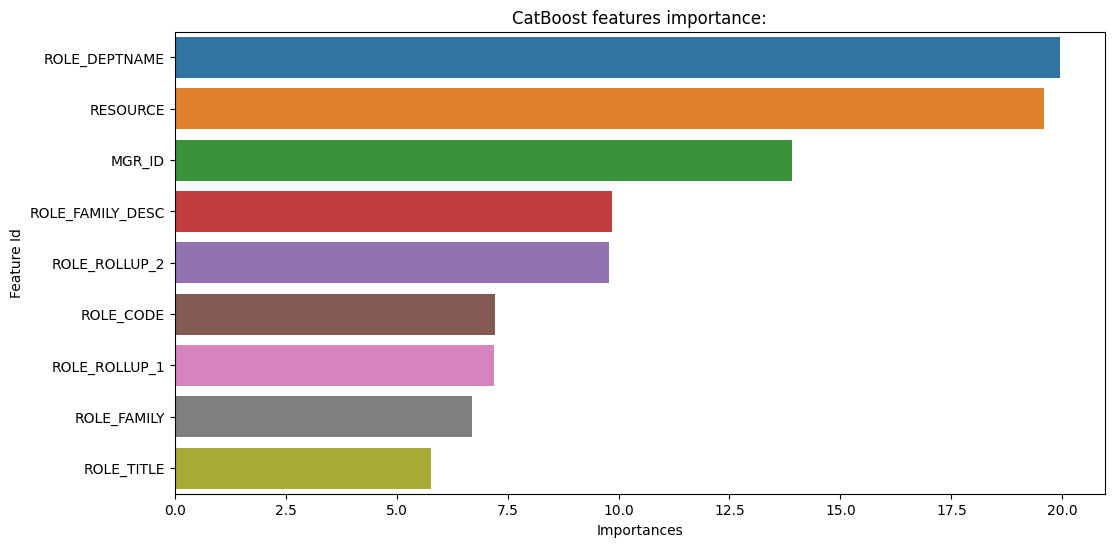

In [219]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6));
sns.barplot(x="Importances", y="Feature Id", data=feature_imp, orient='h');
plt.title('CatBoost features importance:');

In [220]:
predictions=catmodel.predict_proba(x_test)

In [221]:
predictions[0,0]
predictions[0,1]

0.9656784112756989

In [222]:
predictions

array([[0.03432159, 0.96567841],
       [0.01257502, 0.98742498],
       [0.0131636 , 0.9868364 ],
       ...,
       [0.00697074, 0.99302926],
       [0.04615041, 0.95384959],
       [0.01274941, 0.98725059]])

In [223]:
catmodel.score(x_valid,y_valid)

0.9523954836740921

In [224]:
y_pred_valid=catmodel.predict(x_valid)
y_pred_valid

array([1, 1, 1, ..., 0, 1, 1])

In [225]:
print('Accuracy_Score:',metrics.accuracy_score(y_valid,y_pred_valid))
print('F1 Score:',metrics.f1_score(y_valid,y_pred_valid))
print('Precision Score',metrics.precision_score(y_valid,y_pred_valid))
print('Recall Score:',metrics.recall_score(y_valid,y_pred_valid))

<IPython.core.display.Javascript object>

Accuracy_Score: 0.9523954836740921


<IPython.core.display.Javascript object>

F1 Score: 0.9750918090372026


<IPython.core.display.Javascript object>

Precision Score 0.961580853408912


<IPython.core.display.Javascript object>

Recall Score: 0.9889878542510121


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

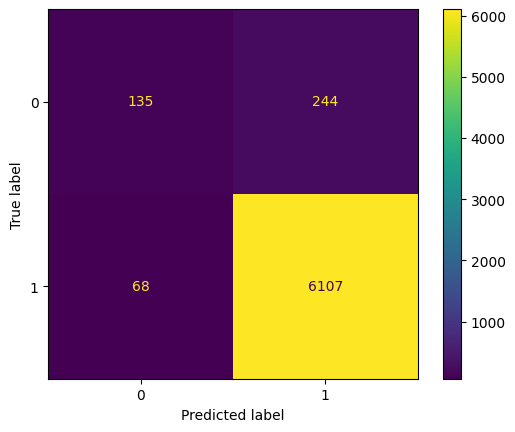

In [226]:
cm=metrics.confusion_matrix(y_valid,y_pred_valid,labels=catmodel.classes_)
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=catmodel.classes_)
disp.plot()

In [227]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [228]:
y_pred_valid=model.predict(x_valid)
y_pred_valid

array([1, 1, 1, ..., 1, 1, 1])

In [229]:
print('Accuracy_Score:',metrics.accuracy_score(y_valid,y_pred_valid))
print('F1 Score:',metrics.f1_score(y_valid,y_pred_valid))
print('Precision Score',metrics.precision_score(y_valid,y_pred_valid))
print('Recall Score:',metrics.recall_score(y_valid,y_pred_valid))

<IPython.core.display.Javascript object>

Accuracy_Score: 0.9478181263350626


<IPython.core.display.Javascript object>

F1 Score: 0.9726268608932288


<IPython.core.display.Javascript object>

Precision Score 0.9615445481880044


<IPython.core.display.Javascript object>

Recall Score: 0.9839676113360324


In [230]:
from xgboost import XGBClassifier
model=XGBClassifier(n_estimators=500,max_depth=5,min_samples_leaf=2,min_samples_split=2,max_features=3)
model.fit(x_train,y_train)

[02:19:08] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_features=3, max_leaves=None,
              min_child_weight=None, min_samples_leaf=2, min_samples_split=2,
              missing=nan, monotone_constraints=None, n_estimators=500,
              n_jobs=None, ...)

In [231]:

y_pred_valid=model.predict(x_valid)
y_pred_valid

array([1, 1, 1, ..., 1, 1, 1])

In [232]:

print('Accuracy_Score:',metrics.accuracy_score(y_valid,y_pred_valid))
print('F1 Score:',metrics.f1_score(y_valid,y_pred_valid))
print('Precision Score',metrics.precision_score(y_valid,y_pred_valid))
print('Recall Score:',metrics.recall_score(y_valid,y_pred_valid))

<IPython.core.display.Javascript object>

Accuracy_Score: 0.9491913335367714


<IPython.core.display.Javascript object>

F1 Score: 0.9735104605838835


<IPython.core.display.Javascript object>

Precision Score 0.9566916823014384


<IPython.core.display.Javascript object>

Recall Score: 0.9909311740890688


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

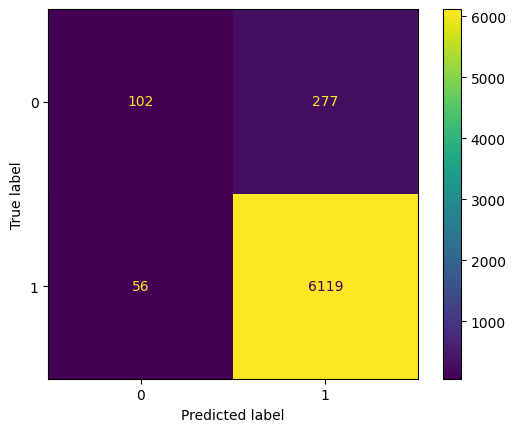

In [233]:
cm=metrics.confusion_matrix(y_valid,y_pred_valid,labels=model.classes_)
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
disp.plot()

In [236]:
pred=catmodel.predict(testdf)
pred

array([1, 1, 1, ..., 1, 1, 1])

In [237]:
pred=model.predict(testdf)
pred

array([1, 1, 1, ..., 1, 1, 1])